In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [2]:
original_img = plt.imread('Leo.png')

In [3]:
def finding_closet_centroids(X, centroids):
    
    K = centroids.shape[0]
    
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        dist = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i]-centroids[j])
            dist.append(norm_ij)
        idx[i] = np.argmin(dist)
    return idx

In [4]:
def compute_centoids(X, idx, K):
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    
    return centroids

In [5]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))
    
    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" %(i, max_iters-1))
        
        idx = finding_closet_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        
        centroids = compute_centoids(X, idx, K)
    plt.show()

    return centroids, idx

In [6]:
def kMeans_init_centroids(X, K):
    
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    
    return centroids

In [7]:
def plot_kMeans_RGB(X, centroids, idx, K):
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

In [16]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

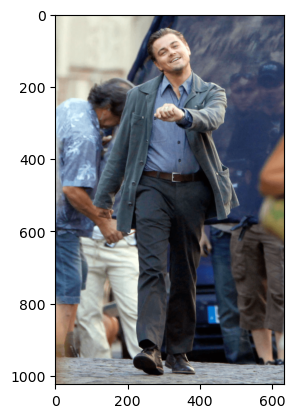

In [8]:
plt.imshow(original_img)

In [9]:
print('Shape of original_image is: ', original_img.shape)

Shape of original_image is:  (1024, 634, 4)


In [10]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 4))
X_img = X_img[:, :3]
X_img

array([[0.8784314 , 0.8862745 , 0.81960785],
       [0.8784314 , 0.8862745 , 0.81960785],
       [0.8666667 , 0.8666667 , 0.8       ],
       ...,
       [0.46666667, 0.5647059 , 0.62352943],
       [0.46666667, 0.5647059 , 0.62352943],
       [0.46666667, 0.5647059 , 0.62352943]], dtype=float32)

In [11]:
K = 16
max_iters =10

intital_centroids = kMeans_init_centroids(X_img, K)
intital_centroids

array([[0.19607843, 0.25882354, 0.3019608 ],
       [0.64705884, 0.63529414, 0.5882353 ],
       [0.67058825, 0.5176471 , 0.41568628],
       [0.07058824, 0.12941177, 0.24313726],
       [0.21960784, 0.23529412, 0.32156864],
       [0.35686275, 0.44705883, 0.59607846],
       [0.2784314 , 0.24313726, 0.23529412],
       [0.09019608, 0.08235294, 0.09411765],
       [0.31764707, 0.4       , 0.44705883],
       [0.07058824, 0.05882353, 0.07058824],
       [0.14509805, 0.16862746, 0.19607843],
       [0.93333334, 0.83137256, 0.78431374],
       [0.13333334, 0.19215687, 0.3254902 ],
       [0.21176471, 0.16078432, 0.14509805],
       [0.10588235, 0.1254902 , 0.19215687],
       [0.05098039, 0.04313726, 0.05490196]], dtype=float32)

In [12]:
centroids, idx = run_kMeans(X_img, intital_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [15]:
print('Shape of idx: ', idx.shape)
print('closest centroids for first five elements: ', idx[:5])

Shape of idx:  (649216,)
closest centroids for first five elements:  [11 11 11 11 11]


/var/folders/mh/s5hgvjdj72q3wmfgm4zcdyxm0000gn/T/ipykernel_9404/1874609657.py:9: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0., 0., 0., .2))


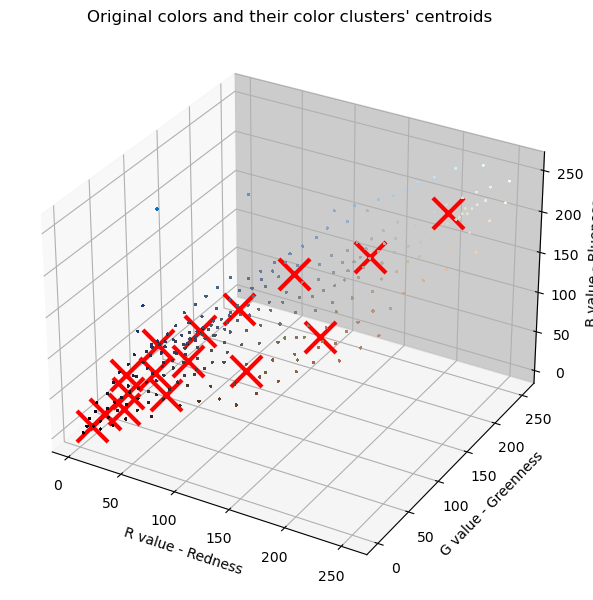

In [14]:
plot_kMeans_RGB(X_img, centroids, idx, K)

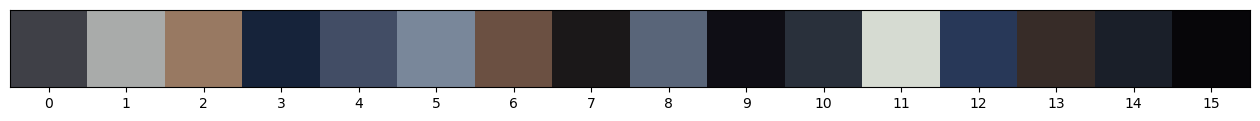

In [17]:
show_centroid_colors(centroids)

In [18]:
idx = finding_closet_centroids(X_img, centroids)

X_recovered = centroids[idx, :]

X_recovered

array([[0.84121621, 0.86155993, 0.82710838],
       [0.84121621, 0.86155993, 0.82710838],
       [0.84121621, 0.86155993, 0.82710838],
       ...,
       [0.47472838, 0.53158116, 0.60503775],
       [0.47472838, 0.53158116, 0.60503775],
       [0.47472838, 0.53158116, 0.60503775]])

In [21]:
alpha_value = 1

rgba_values = np.c_[X_recovered, np.full((X_recovered.shape[0], 1), alpha_value)]
rgba_values

array([[0.84121621, 0.86155993, 0.82710838, 1.        ],
       [0.84121621, 0.86155993, 0.82710838, 1.        ],
       [0.84121621, 0.86155993, 0.82710838, 1.        ],
       ...,
       [0.47472838, 0.53158116, 0.60503775, 1.        ],
       [0.47472838, 0.53158116, 0.60503775, 1.        ],
       [0.47472838, 0.53158116, 0.60503775, 1.        ]])

In [22]:
X_recovered = np.reshape(rgba_values, original_img.shape)

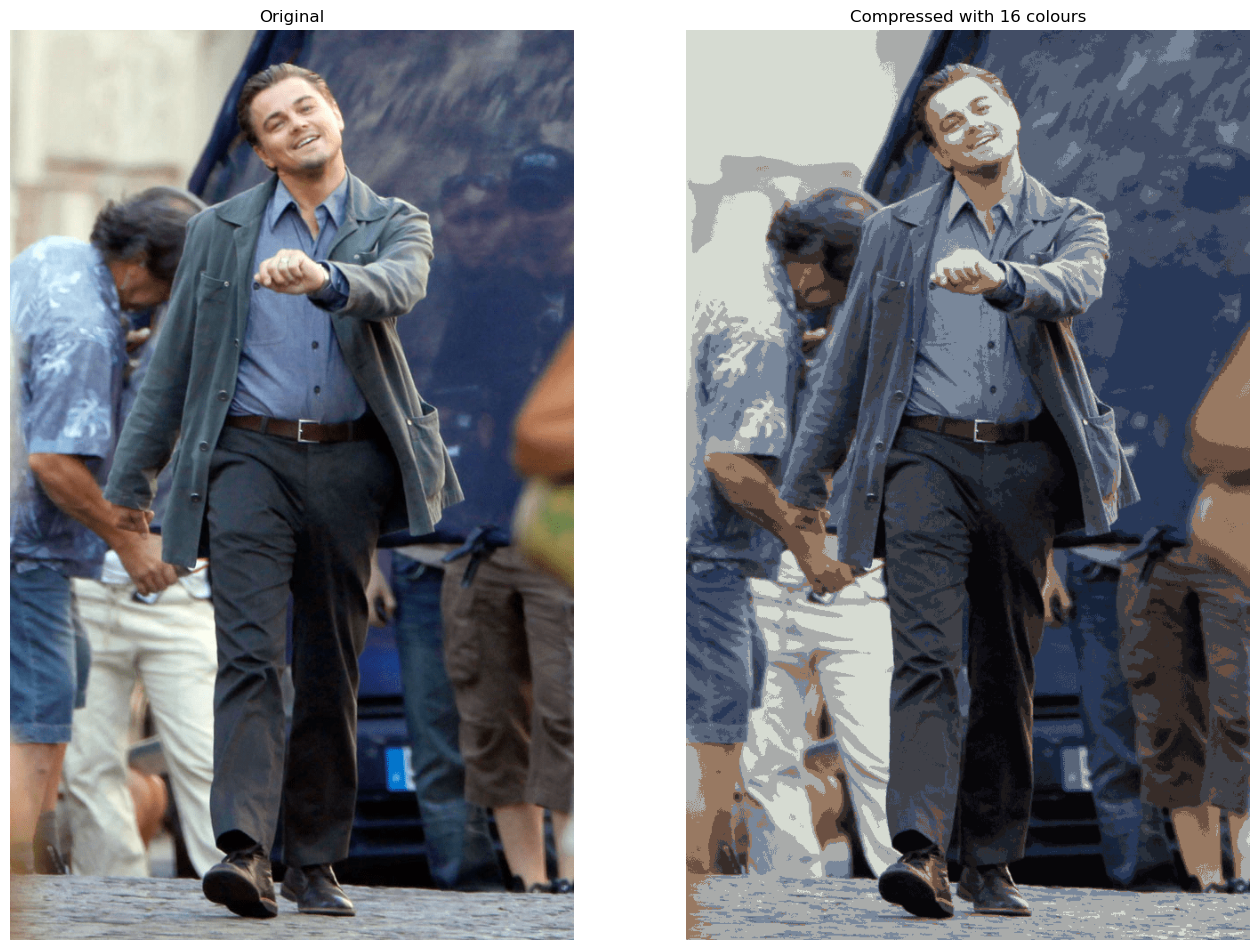

In [23]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()



ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [24]:
plt.imsave('Leo_After.png', X_recovered, cmap='viridis')